# Assignment 1

Part A
* Load your image
1. Display it in RGB
2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )
3. Use the cvtColor function to do the same and compare results
4. Print the array shapes of both the RGB and grayscale images
5. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
local_img_path = 'orange_image.jpeg'

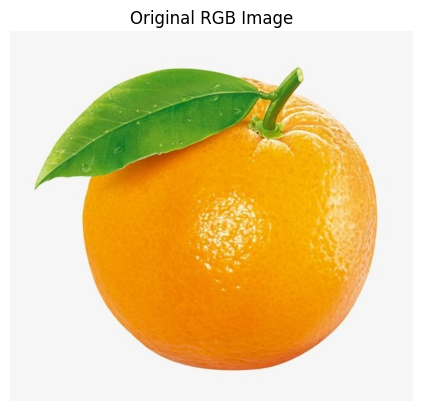

In [3]:
img_bgr = cv2.imread(local_img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

Converting RGB to Grayscale 
As it is in the form of tensor we write it like

1. rgb_float[:,:,0] → Red channel
2. rgb_float[:,:,1] → Green channel
3. rgb_float[:,:,2] → Blue channel

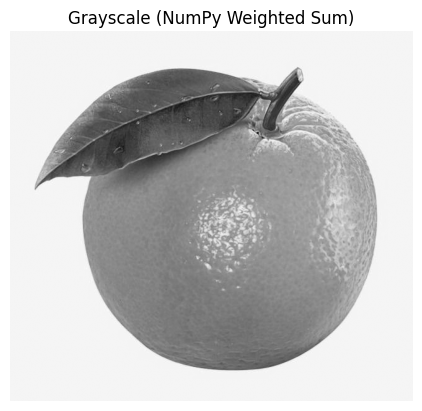

In [4]:
rgb_float = img_rgb.astype(np.float32)

# grayscale from scratch (NumPy weighted sum)
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
gray_np = np.clip(np.dot(rgb_float, weights), 0, 255).astype('uint8')

 # Then we Convert back to uint8
gray = gray_np.astype(np.uint8)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale (NumPy Weighted Sum)")
plt.axis("off")
plt.show()

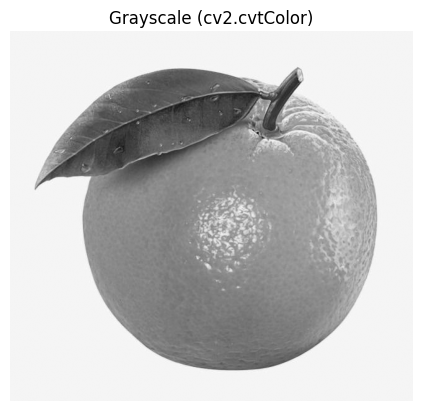

In [5]:
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv, cmap="gray")
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")
plt.show()

And we observed the same result using when we converted it into grayscale using numpy and CV function

In [6]:
# Now printing the shapes of both images RGB and Grayscale

print("RGB shape:", img_rgb.shape)
print("Grayscale shape using Numpy:", gray_np.shape)
print("Grayscale shape using cv2:", gray_cv.shape)

RGB shape: (597, 650, 3)
Grayscale shape using Numpy: (597, 650)
Grayscale shape using cv2: (597, 650)


And we can notice above that RGB as 3D tensor while Grayscale image as 1.

# Part B
* B1. Compute the FFT of the grayscale image ( use NumPy )

* Steps:
- np.fft.fft2
- np.fft.fftshift
- Store as fshift

In [7]:
rgb_float = img_rgb.astype(np.float32)

# Weighted sum 
gray_np = 0.299 * rgb_float[:,:,0] + 0.587 * rgb_float[:,:,1] + 0.114 * rgb_float[:,:,2]
gray = gray_np.astype(np.float32)

f = np.fft.fft2(gray)

# Then we are doing shift low frequency to center
fshift = np.fft.fftshift(f)

# print("FFT. Shape:", fshift) # Gives values instead of shape
print("FFT. Shape:", fshift.shape)

FFT. Shape: (597, 650)


B2. Compute magnitude, phase and display Magnitude Spectrum

In [8]:
magnitude = np.abs(fshift)
phase = np.angle(fshift)

print("Magnitude:", magnitude)
print("Phase :", phase)


Magnitude: [[216.65419 154.23888 335.73746 ... 246.47015 214.89288 202.87903]
 [457.06897 250.61646 212.81158 ... 405.9947  601.8782  487.77917]
 [103.09202 326.44977 548.7827  ... 464.1188   53.70511 164.95767]
 ...
 [103.09202 164.95767  53.70511 ... 273.21558 548.7827  326.44977]
 [457.06897 487.77917 601.8782  ... 162.34155 212.81158 250.61646]
 [216.65419 202.87903 214.89288 ... 337.85953 335.73746 154.23888]]
Phase : [[ 2.7648282  -0.28865796 -1.1621567  ... -1.3945264  -1.7108557
   2.1846771 ]
 [ 1.207199    2.2511497  -2.062233   ...  2.0295346  -2.3584979
  -0.26143643]
 [-0.38592124  2.8578734  -1.4516771  ...  1.4936566   1.2777314
  -0.6294842 ]
 ...
 [ 0.38592124  0.6294842  -1.2777314  ... -1.1519653   1.4516771
  -2.8578734 ]
 [-1.207199    0.26143643  2.3584979  ...  0.7009115   2.062233
  -2.2511497 ]
 [-2.7648282  -2.1846771   1.7108557  ... -1.566865    1.1621567
   0.28865796]]


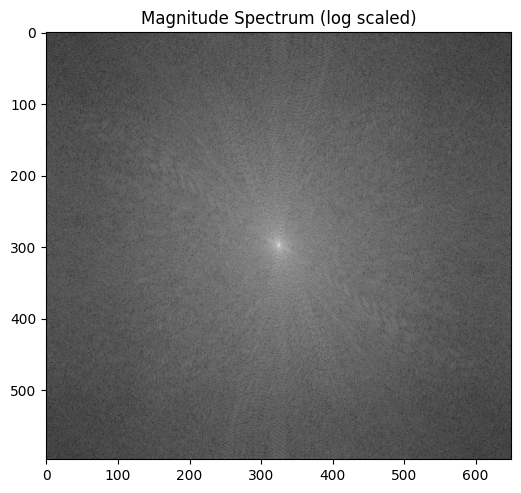

In [9]:
magnitude_spectrum = 20 * np.log(1 + magnitude)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (log scaled)")
# plt.axis("off")
plt.show()

# Part C

### C1. Create 3 LPF masks
* Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

- For each:
- Create a mask

1. Apply to fshift
2. Reconstruct using ifftshift + ifft2
3. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

In [10]:
def reconstruct(fshift_masked):
    # 1. Undo the shift
    f_ishift = np.fft.ifftshift(fshift_masked)

    # In this step applying inverse FFT
    img_back = np.fft.ifft2(f_ishift)

    # Taking the real part (imaginary should be ~0)
    img_back = np.real(img_back)

    return img_back

In [11]:
# Now Creating 3 LPF (Low-Pass) masks: radii = 10, 30, 80

def circular_lpf_mask(shape, radius):
    H, W = shape
    ccol, crow = H // 2, W // 2  # center of frequency domain

    Y, X = np.ogrid[:H, :W]
    dist = np.sqrt((Y - ccol)**2 + (X - crow)**2)

    mask = (dist <= radius).astype(np.float32)
    return mask

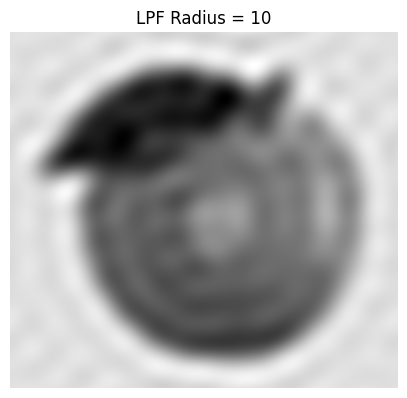

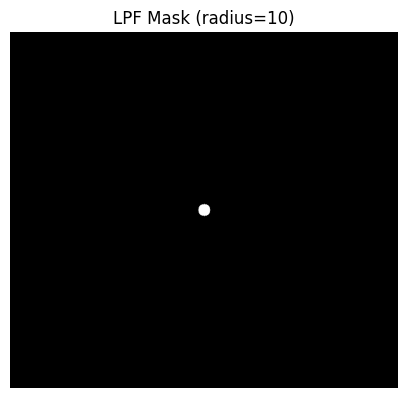

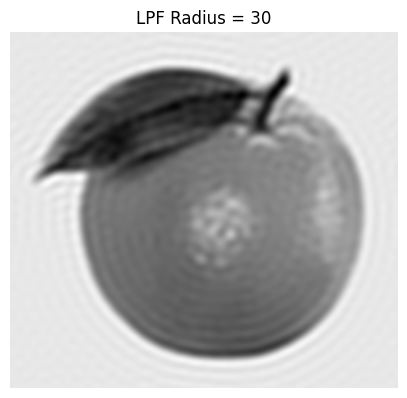

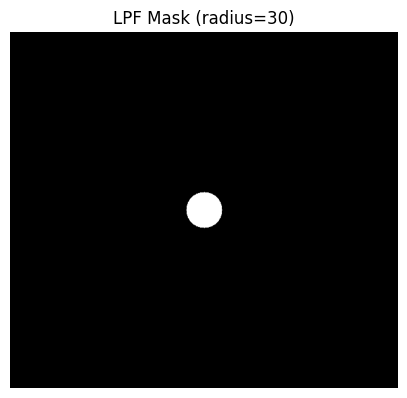

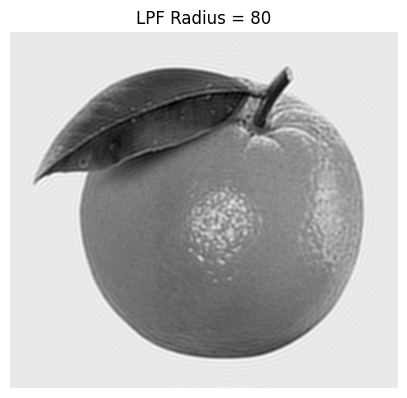

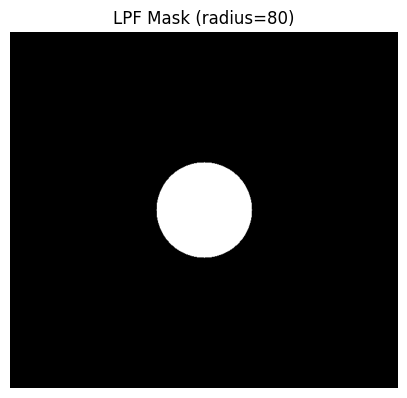

In [12]:
radii = [10, 30, 80]   # you may change if image is too small

for r in radii:
    mask = circular_lpf_mask(fshift.shape, r)

    # Applying mask
    fshift_lpf = fshift * mask

    # And Reconstructing the image
    img_lpf = reconstruct(fshift_lpf)

    plt.figure(figsize=(5,5))
    plt.imshow(img_lpf, cmap='gray')
    plt.title(f"LPF Radius = {r}")
    plt.axis("off")
    plt.show()

    # Show mask too
    plt.figure(figsize=(5,5))
    plt.imshow(mask, cmap='gray')
    plt.title(f"LPF Mask (radius={r})")
    plt.axis("off")
    plt.show()

The output shows blur levels inversely proportional to radius
 as blur levels increasing as radius decreases
 * REASON - Because we have Smaller LPF radius that means fewer high-frequency components will pass and thus edges/details removed that's why image becomes blurrier.


* C2. Create HPF mask
- Apply
- Reconstruct

In [13]:
def circular_hpf_mask(shape, radius):
    # HPF = inverse of LPF
    lpf = circular_lpf_mask(shape, radius)
    hpf = 1 - lpf
    return hpf

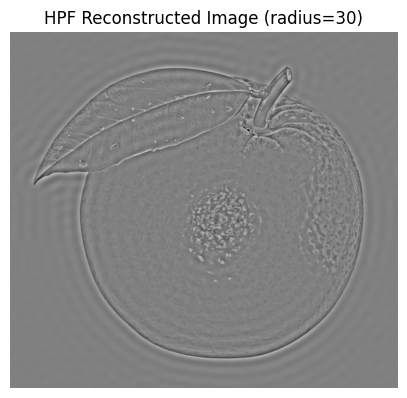

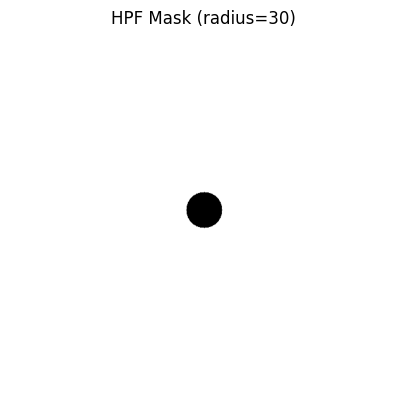

In [14]:
hpf_radii = [30]   # you can adjust

for hpf_radius in hpf_radii:
    mask_hpf = circular_hpf_mask(fshift.shape, hpf_radius)

    # Apply HPF
    fshift_hpf = fshift * mask_hpf

    # Reconstruct
    img_hpf = reconstruct(fshift_hpf)

    # Display reconstructed HPF image
    plt.figure(figsize=(5,5))
    plt.imshow(img_hpf, cmap='gray')
    plt.title(f"HPF Reconstructed Image (radius={hpf_radius})")
    plt.axis("off")
    plt.show()

    # Display HPF mask
    plt.figure(figsize=(5,5))
    plt.imshow(mask_hpf, cmap='gray')
    plt.title(f"HPF Mask (radius={hpf_radius})")
    plt.axis("off")
    plt.show()


- HPF keeps high frequencies that highlights edges.
- And thus Larger HPF radius means stronger edge details.


C3. Create a square LPF mask
* Keep side of square as 50. The square will be at the center of the filter. Apply, Recontruct and show the output.

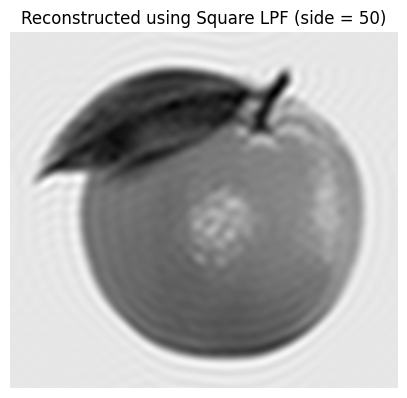

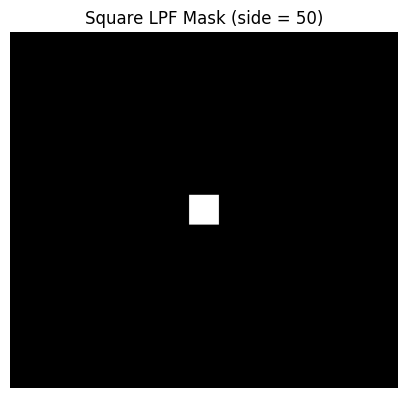

In [15]:
side = 50  
rows, cols = gray_np.shape
crow, ccol = rows // 2, cols // 2  

# Create square LPF mask
mask_square = np.zeros((rows, cols), np.float32)

half = side // 2

# Define square boundaries (centered)
top = crow - half
bottom = crow + half
left = ccol - half
right = ccol + half

mask_square[top:bottom, left:right] = 1  # fill the center square with 1s

# Applying mask to fshift
fshift_sq = fshift * mask_square

# And reconstructing the image
img_sq = reconstruct(fshift_sq)

# For reconstructed image
plt.figure(figsize=(5,5))
plt.imshow(img_sq, cmap='gray')
plt.title("Reconstructed using Square LPF (side = 50)")
plt.axis("off")
plt.show()

# Mask Display
plt.figure(figsize=(5,5))
plt.imshow(mask_square, cmap='gray')
plt.title("Square LPF Mask (side = 50)")
plt.axis("off")
plt.show()


# Part D

D1. Phase-only reconstruction
* Use: phase_only = fshift / np.abs(fshift)

- Reconstruct and display.
- Also in code comments, mention the differnce between this code line and the one in the lecture : np.angle(f_shift)
- Try recontruction from np.angle(f_shift) once and explain your output in code comments

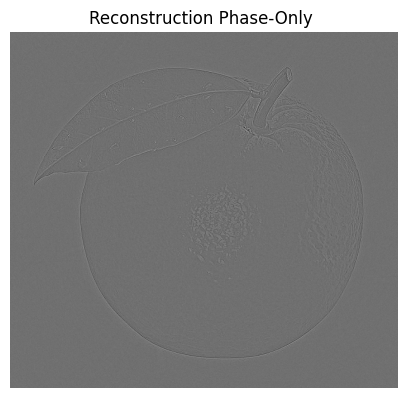

In [16]:
eps = 1e-9      

# Normalize FFT so all magnitudes become 1 → keeps only phase
phase_only = fshift / (np.abs(fshift) + eps)

img_phase = reconstruct(phase_only)

plt.figure(figsize=(5,5))
plt.imshow(img_phase, cmap='gray')
plt.title("Reconstruction Phase-Only ")
plt.axis("off")
plt.show()


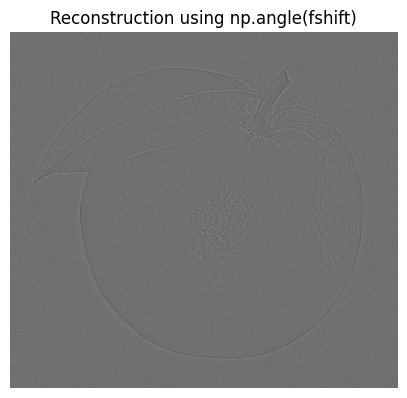

In [17]:
theta = np.angle(fshift)             # only phase, no magnitude
phase_exp = np.exp(1j * theta)       # convert angle to complex form

img_from_angle = reconstruct(phase_exp)

plt.figure(figsize=(5,5))
plt.imshow(img_from_angle, cmap='gray')
plt.title("Reconstruction using np.angle(fshift)")
plt.axis("off")
plt.show()


D2. Magnitude-only reconstruction
Use: mag_only = np.abs(fshift)

- Reconstruct and display.
- Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

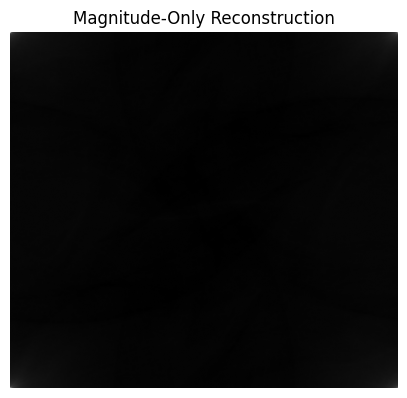

In [18]:
mag_only = np.abs(fshift)    # using this function keeps only magnitude (phase removed)

img_mag = reconstruct(mag_only)

plt.figure(figsize=(5,5))
plt.imshow(img_mag, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis("off")
plt.show()
